# Job Dataset

## 1. Load, clean, and explore the datasets provided

In [ ]:
import pandas as pd
job=pd.read_csv("https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/jobs.csv",on_bad_lines='skip')
job.head(7)
job.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
t      0
y      0
e      0
dtype: int64

In [ ]:
job.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,3212.0,2.382901e-16,1.000000,-1.461095,-0.802463,-0.332011,0.797073,2.114337
x2,3212.0,-3.820971e-16,1.000000,-3.986840,-0.579611,0.101835,0.442558,1.805449
x3,3212.0,3.742217e-01,0.483997,0.000000,0.000000,0.000000,1.000000,1.000000
x4,3212.0,4.887920e-02,0.215649,0.000000,0.000000,0.000000,0.000000,1.000000
x5,3212.0,7.079701e-01,0.454767,0.000000,0.000000,1.000000,1.000000,1.000000
x6,3212.0,4.118929e-01,0.492253,0.000000,0.000000,0.000000,1.000000,1.000000
x7,3212.0,-1.200783e-16,1.000000,-1.147411,-0.892339,-0.085212,0.550661,8.751987
x8,3212.0,4.956600e-17,1.000000,-1.110467,-0.913914,-0.083460,0.562908,10.165068
x9,3212.0,-6.083414e-18,1.000000,-1.164047,-0.785284,-0.435556,0.673018,2.446737
x10,3212.0,1.757408e-14,1.000000,-0.948832,-0.743407,-0.499853,0.526738,2.773336


## • Can you identify the causal questions for each dataset?
 - What would be the job outcome if we gave this person training t1?

 ## Select appropriate evaluation metrics for each dataset. Justify your choices. Things to consider:
- • Granularity of predictions and measured errors (average vs. individual).
- • Whether the dataset includes counterfactual outcomes (or true individual effects).

#### the data has 17 factors (x) that are effecting the output. It has one treatment, one outcome and one observation information hence it has low granularity
#### Each individual output is important and hence the error will be based on some individual importance
#### Jobs dataset has True Individual Effects 

We can use Polisy risk, ATE and ATT as well. Since Polisy risk is a better meaurement of accuracy we will go with it

## Simple learners
#### (a) Choose at least one regression model that provides feature importances. Examples: linear regression, decision tree, random forest, boosted trees. 
- Taking into account the model and the dataset, preprocess the data if needed.
- In your report, make sure that you justify your choice of regressor. All models have strengths and weaknesses — what makes the one you chose more appealing?

1. Decison Tree Regression because of available feature imporrtance function
## From the description it can be seen that dataset is imbalanced so undersampling technique is applied to balance the dataset

In [ ]:
import plotly.express as px
test = pd.DataFrame(job['y'].value_counts(normalize=False))
test = test.reset_index()
test.columns = ['Indicated Job Training','count']
test.machine_status = test['Indicated Job Training'].astype(str)
fig = px.bar(test, x='Indicated Job Training', y='count',title= "Status of the Indicated Job Training before using SMOTE")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


x1, Score: 0.02118
x2, Score: 0.02455
x3, Score: 0.04856
x4, Score: 0.02457
x5, Score: 0.50735
x6, Score: 0.00019
x7, Score: 0.11988
x8, Score: 0.11545
x9, Score: 0.03094
x10, Score: 0.02294
x11, Score: 0.02883
x12, Score: 0.02135
x13, Score: 0.00828
x14, Score: 0.00109
x15, Score: 0.00221
x16, Score: 0.02263
x17, Score: 0.00000


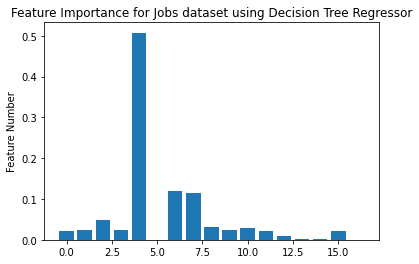

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = job[job.columns[:17]],job['e']
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X, y = rus.fit_resample(X, y)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('x%0d, Score: %.5f' % (i+1,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance for Jobs dataset using Decision Tree Regressor")
pyplot.ylabel("Feature Score")
pyplot.ylabel("Feature Number")
pyplot.show()

In [ ]:
Features_Importance=pd.DataFrame([job.columns[:17],importance]).T
Features_Importance.columns=['Feature Name','Score']
Features_Importance.sort_values("Score",ascending=False)

,Feature Name,Score
4,x5,0.507353
6,x7,0.119879
7,x8,0.115449
2,x3,0.048557
8,x9,0.030943
10,x11,0.028827
3,x4,0.024571
1,x2,0.024549
9,x10,0.022943
15,x16,0.022626


## Train the model(s) of your choice on both datasets using all available features (including treatment).

In [ ]:
X=job[job.columns[:18]]
y=job['e']

## b) Train the model(s) of your choice on both datasets using all available features (including treatment). 
### (c) Make effect predictions and compute relevant metrics.
- Make predictions yˆ1 and yˆ0 by setting treatment to 1 and 0 respectively. Obtain effect estimates as yˆ1 − yˆ0.

In [ ]:
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
pred_regre=model.predict(X)

In [ ]:
len(pred_regre)

3212

In [ ]:
# Make effect predictions and compute relevant metrics.

In [ ]:
pred_regre[pred_regre>0.5]=1
pred_regre[pred_regre<=0.5]=0

In [ ]:
len(pred_regre)

3212

In [ ]:
def policy_risk(effect_pred, yf, t, e):
    """
    Computes the risk of the policy defined by predicted effect
    :param effect_pred: predicted treatment effect value
    :param yf: factual (observed) outcome
    :param t: treatment status (treated/control)
    :param e: whether belongs to the experimental group
    :return: policy risk
    """
    # Consider only the cases for which we have experimental data (i.e., e > 0)
    t_e = t[e > 0]
    yf_e = yf[e > 0]
    effect_pred_e = effect_pred[e > 0]

    if np.any(np.isnan(effect_pred_e)):
        return np.nan

    policy = effect_pred_e > 0.0
    treat_overlap = (policy == t_e) * (t_e > 0)
    control_overlap = (policy == t_e) * (t_e < 1)

    if np.sum(treat_overlap) == 0:
        treat_value = 0
    else:
        treat_value = np.mean(yf_e[treat_overlap])

    if np.sum(control_overlap) == 0:
        control_value = 0
    else:
        control_value = np.mean(yf_e[control_overlap])

    pit = np.mean(policy)
    policy_value = pit * treat_value + (1.0 - pit) * control_value

    return 1.0 - policy_value

In [ ]:
import numpy as np

In [ ]:
policy_risk(pred_regre,job['y'],job['t'],job['e'])

0.22666181668951746

d) Perform hyperparameter optimisation for your model(s) using grid search and appropriate
modeling techniques.


In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
X=job[job.columns[:18]]
y=job['e']
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
max_features = ['auto', 'sqrt', 'log2']
splitter = ['best', 'random']
# define grid search
grid = dict(criterion=criterion,max_features=max_features,splitter=splitter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.933581 using {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}
0.928912 (0.014166) with: {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}
0.929950 (0.015302) with: {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'}
0.929016 (0.016091) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
0.932852 (0.014071) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
0.926004 (0.015412) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
0.932854 (0.013525) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}
0.930365 (0.011269) with: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
0.933581 (0.014482) with: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}
0.931614 (0.014389) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
0.930155 (0.017928) with: {'criterion': 'entropy', 'max_feature

In [ ]:
## e) Report the performance (chosen metric(s)) of your model(s) using 10-fold cross-validation or a training/validation/test split

In [ ]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(criterion='entropy',max_features='sqrt',splitter='best')
scores = cross_val_score(clf, X, y, cv=10)

In [ ]:
scores

array([0.92546584, 0.90372671, 0.91588785, 0.92211838, 0.9376947 ,
       0.95950156, 0.92834891, 0.90654206, 0.94080997, 0.94080997])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X=job[job.columns[:18]]

In [ ]:
X_train, X_test, y_train, y_test, Out_x,out_y = train_test_split(X, y,job['y'], test_size=0.33, random_state=1)
model = DecisionTreeClassifier(criterion='entropy',max_features='sqrt',splitter='best')
# fit the model
model.fit(X_train, y_train)
# get importance
pred_regre=model.predict(X_test)
policy_risk(pred_regre,out_y,X_test['t'],y_test)

In [ ]:
X_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
1721,-0.143830,0.442558,0.0,0.0,1.0,0.0,0.124337,0.692182,-0.277188,-0.375322,0.345809,-0.168387,0.236242,0.0,0.0,0.135970,0.0
2857,-1.178824,0.101835,1.0,0.0,0.0,0.0,-0.628415,-0.679216,-1.017557,-0.877667,-0.022502,-0.493160,-0.475602,0.0,0.0,-0.559598,0.0
171,-0.520192,0.101835,1.0,0.0,0.0,0.0,-0.992531,-1.084760,-0.583365,-0.608340,-0.022502,-0.552277,-0.518662,0.0,0.0,-0.854529,0.0
2370,-0.049740,0.101835,0.0,0.0,1.0,0.0,-1.147411,-1.110467,-0.194045,-0.306693,-0.022502,-0.558057,-0.518815,1.0,1.0,-0.979981,0.0
700,1.361615,1.805449,0.0,0.0,1.0,0.0,0.196595,-0.392280,1.369836,1.331331,2.113702,-0.122848,-0.398967,0.0,0.0,0.562256,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,-0.708372,0.101835,1.0,0.0,0.0,0.0,-0.909157,-0.913210,-0.720617,-0.701889,-0.022502,-0.544380,-0.509774,0.0,0.0,-0.786997,0.0
124,-1.084734,-0.238888,1.0,0.0,1.0,1.0,-0.449437,-0.590173,-0.963448,-0.848598,-0.361348,-0.440683,-0.455914,0.0,0.0,-0.461739,0.0
2111,0.138440,0.783281,1.0,0.0,1.0,0.0,-1.147411,-1.110467,-0.019840,-0.156019,0.743585,-0.558057,-0.518815,1.0,1.0,-0.979981,0.0
2713,-1.272914,-0.238888,1.0,0.0,0.0,1.0,-1.033965,-1.110467,-1.069026,-0.903971,-0.361348,-0.554956,-0.518815,0.0,1.0,-0.895748,0.0


In [ ]:
# Plot Feature Importance and comments

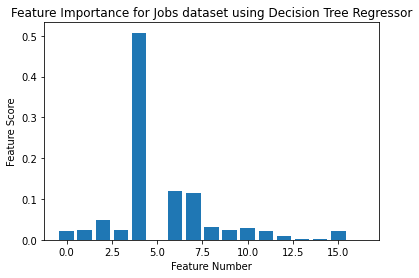

In [ ]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance for Jobs dataset using Decision Tree Regressor")
pyplot.ylabel("Feature Score")
pyplot.xlabel("Feature Number")
pyplot.show()

##  Propensity score re-weighting
### (a) Train a classifier (of your choice) to predict propensity scores based on background features X. See section 5.1 for more details.


In [ ]:
T=job['t']

from sklearn.linear_model import LogisticRegression

ps_model = LogisticRegression().fit(X, T)


In [ ]:
job['propensity_score']=ps_model.predict_proba(X)[:,1]

In [ ]:
weight_t = 1/job.query("t==1")["propensity_score"]
weight_nt = 1/(1-job.query("t==0")["propensity_score"])
print("Original Sample Size", job.shape[0])
print("Treated Population Sample Size", sum(weight_t))
print("Untreated Population Sample Size", sum(weight_nt))

Original Sample Size 3212
Treated Population Sample Size 305.80165205910646
Untreated Population Sample Size 2923.484130712986


b) Create a function that calculates sample weights (wi) based on their propensity scores (e(xi))
you calculated in the previous step.

In [ ]:
weight = ((job["t"]-job["propensity_score"]) /
          (job["propensity_score"]*(1-job["propensity_score"])))

y1 = sum(job.query("t==1")["y"]*weight_t) / len(job)
y0 = sum(job.query("t==0")["y"]*weight_nt) / len(job)

ate = np.mean(weight * job["y"])

print("Y1:", y1)
print("Y0:", y0)
print("ATE", np.mean(weight * job["y"]))

Y1: 0.07384255204597623
Y0: 0.7803351937988985
ATE -0.7064926417529207


c) Use the weights returned by the function as the sample weights to train a weighted regressor (use the regressor(s) chosen in task 3).


x1, Score: 0.02036
x2, Score: 0.02832
x3, Score: 0.02956
x4, Score: 0.00964
x5, Score: 0.42051
x6, Score: 0.00672
x7, Score: 0.02114
x8, Score: 0.18623
x9, Score: 0.01562
x10, Score: 0.03419
x11, Score: 0.01532
x12, Score: 0.01977
x13, Score: 0.02621
x14, Score: 0.00000
x15, Score: 0.00000
x16, Score: 0.03921
x17, Score: 0.00069
x18, Score: 0.12649


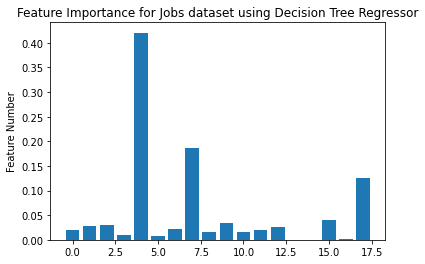

In [ ]:
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y,abs(weight))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('x%0d, Score: %.5f' % (i+1,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance for Jobs dataset using Decision Tree Regressor")
pyplot.ylabel("Feature Score")
pyplot.ylabel("Feature Number")
pyplot.show()

In [ ]:
## (d) Repeat steps 3d - 3f, but for weighted regression.


In [ ]:
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y,abs(weight))
# get importance
pred_regre=model.predict(X)

In [ ]:
pred_regre[pred_regre>0.5]=1
pred_regre[pred_regre<=0.5]=0

In [ ]:
policy_risk(pred_regre,job['y'],job['t'],job['e'])

0.22666181668951746

In [ ]:
X=job[job.columns[:18]]
y=job['e']
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
max_features = ['auto', 'sqrt', 'log2']
splitter = ['best', 'random']
# define grid search
grid = dict(criterion=criterion,max_features=max_features,splitter=splitter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y,sample_weight=abs(weight))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.933681 using {'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}
0.932444 (0.015953) with: {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}
0.933276 (0.015243) with: {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'}
0.926215 (0.014972) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
0.931715 (0.015751) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
0.928393 (0.016291) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
0.930778 (0.015060) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}
0.932442 (0.014707) with: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
0.931298 (0.012711) with: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}
0.928392 (0.013504) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
0.930674 (0.014929) with: {'criterion': 'entropy', 'max_features'

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',max_features='sqrt',splitter='random')
scores = cross_val_score(clf, X, y, cv=10)

In [ ]:
scores

array([0.91304348, 0.90993789, 0.94392523, 0.93457944, 0.94392523,
       0.95015576, 0.91900312, 0.93146417, 0.94080997, 0.9470405 ])

In [ ]:
X_train, X_test, y_train, y_test, Out_x,out_y,wt_1,wt_2 = train_test_split(X, y,job['y'],weight, test_size=0.33, random_state=1)
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train,wt_1)
# get importance
pred_regre=model.predict(X_test)
policy_risk(pred_regre,out_y,X_test['t'],y_test)

0.25

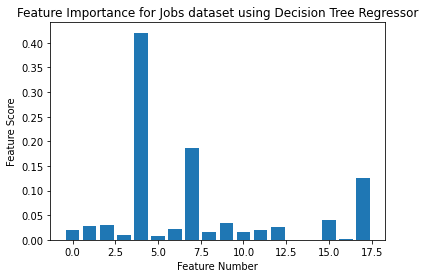

In [ ]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance for Jobs dataset using Decision Tree Regressor")
pyplot.ylabel("Feature Score")
pyplot.xlabel("Feature Number")
pyplot.show()

5. Advanced CATE estimators
(a) Choose at least one CATE estimator from EconML package (https://econml.azurewebsites.
net/reference.html#cate-estimators). Comment on your choice(s).
(b) Train the estimator(s) on the data.
2
(c) Predict effects and calculate relevant evaluation metrics.
(d) Report the metrics and comment on your results. How do they compare to previous results?

In [ ]:
!pip install econml

In [ ]:
# Main imports
from econml.metalearners import TLearner, SLearner
# Helper imports 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
import numpy as np
from numpy.random import binomial, multivariate_normal, normal, uniform
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
X=job[job.columns[:17]]
Y=job['y']
T=job['t']

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=6)
T_learner = TLearner(models=model)
# T-learner
T_learner.fit(Y, T, X=X)
T_te = T_learner.effect(X)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [ ]:
policy_risk(T_te,Y,T,job['e'])

In [ ]:
model = LogisticRegression(C=0.1, solver='newton-cg')
T_learner = TLearner(models=model)
# T-learner
T_learner.fit(Y, T, X=X)
T_te = T_learner.effect(X)
policy_risk(T_te,Y,T,job['e'])

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=6)
S_learner = SLearner(overall_model=model)
# S-learner
S_learner.fit(Y, T, X=X)
S_te = S_learner.effect(X)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [ ]:
policy_risk(T_te,Y,T,job['e'])

In [ ]:
model = LogisticRegression(C=0.1, solver='newton-cg')
S_learner = SLearner(overall_model=model)
# T-learner
S_learner.fit(Y, T, X=X)
S_te = S_learner.effect(X)
policy_risk(S_te,Y,T,job['e'])

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
